In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


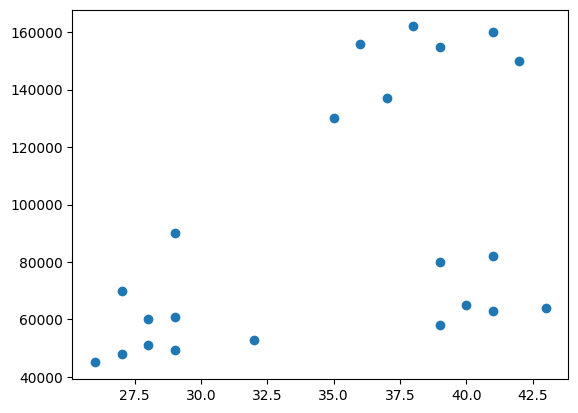

In [3]:
plt.scatter(df['Age'], df['Income($)'])
plt.show()

In [4]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3)

km.fit(df[['Age', 'Income($)']])
km.labels_

array([0, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [5]:
df['Cluster'] = km.labels_
df.head()

,Name,Age,Income($),Cluster
0,Rob,27,70000,0
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [6]:
import seaborn as sns

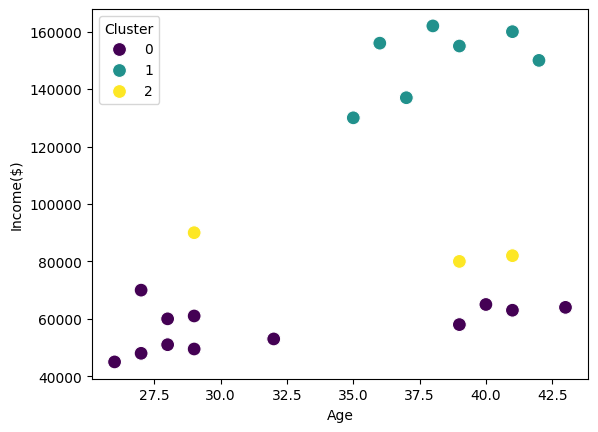

In [7]:
sns.scatterplot(df, x='Age', y='Income($)', hue='Cluster', palette='viridis', s=100)
plt.show()

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_scaled = pd.DataFrame(columns=['Age', 'Income($)'])

df_scaled[['Age', 'Income($)']] = scaler.fit_transform(df[['Age', 'Income($)']])
df_scaled.head()

,Age,Income($)
0,0.058824,0.213675
1,0.176471,0.384615
2,0.176471,0.136752
3,0.117647,0.128205
4,0.941176,0.897436


In [9]:
km.fit(df_scaled[['Age', 'Income($)']])
km.labels_

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [14]:
df_scaled['Cluster'] = km.labels_
df_scaled.head()

centroids = km.cluster_centers_

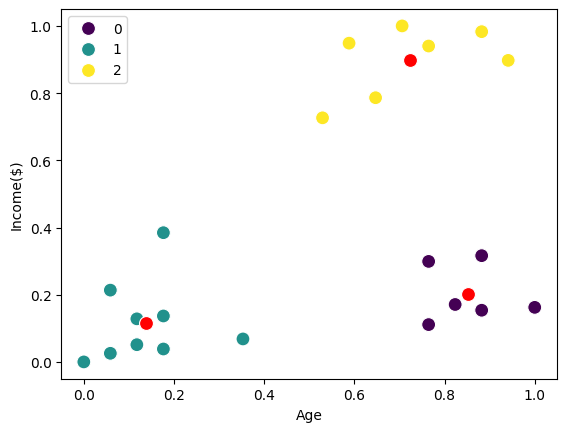

In [15]:
sns.scatterplot(df_scaled, x='Age', y='Income($)', hue='Cluster', palette='viridis', s=100)
sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1], s=100, markers='*', color='red')
plt.show()

In [16]:
sse = []

k_rng = range(1,10)

for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df_scaled[['Age', 'Income($)']])
    sse.append(km.inertia_)

sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553096,
 0.368773407644059,
 0.2818479744366238,
 0.21055478995472496,
 0.20320413291201161,
 0.14682060617795398,
 0.11304517838728054]

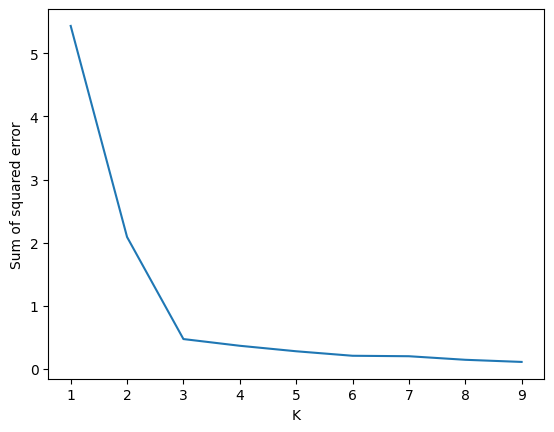

In [17]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng, sse)
plt.show()